In [1]:
#importo las bibliotecas que me hacen falta
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from src import functions_cleaning as fc

In [2]:
#Hipotesis:
#1-Los tiburones atacan mas a los hombres que a las mujeres
#2-Los ataques provocados son mas mortales
#3-Hubo mas ataques despues del año 2000

In [3]:
#importo el csv de los tiburones
df = pd.read_csv("sharks_clean.csv",encoding = "ISO-8859-1")

In [4]:
df.head()

,Unnamed: 0,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Provoked,Sex,Muerte
0,0,25-Jun-2018,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,Yes,F,N
1,1,18-Jun-2018,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,AdysonÂ McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,No,F,N
2,2,09-Jun-2018,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,No,M,N
3,3,08-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,No,M,N
4,4,04-Jun-2018,2018,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",Yes,M,N


In [5]:
df.Sex.unique()

array(['F', 'M', 'Unknown'], dtype=object)

In [6]:
#1-Los tiburones atacan mas a los hombres que a las mujeres
hip1 = pd.DataFrame(df.groupby(["Sex", "Provoked"])["Provoked"].count())
hip1.head()

Provoked
Sex Provoked          
F   No             597
    Yes             40
M   No            4308
    Unknown          4
    Yes            784

In [ ]:
#De 6301 ataques registrados, 5096 son a hombres, lo que representa un 80% del total
#Del total de ataques, un 13.08% son provocados
#De los ataques a mujeres , que son un 20% del total, el 6.27% son provocados, mientras que el 15.38% de los a hombres son provocados.


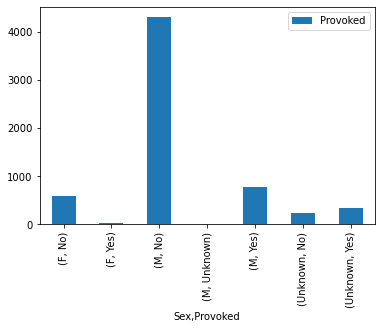

In [7]:
hip1.plot(kind="bar");

In [ ]:
#Como se puede ver, las muertes de los hombres son muchas mas que las de las mujeres. Dentro de su grupo, las no provocadas superan con creces a las provocadas.
#La primera hipótesis es CIERTA

In [6]:
#Compruebo la segunda hipotesis
hip2 = pd.DataFrame(df.groupby(["Provoked", "Muerte"])["Muerte"].count())
hip2.head()

Muerte
Provoked Muerte        
No       N         3365
         Y         1777
Unknown  N            1
         Y            3
Yes      N          935

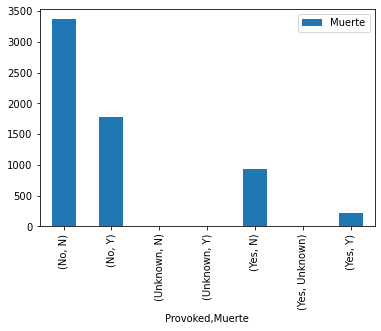

In [7]:
hip2.plot(kind="bar");

In [ ]:
#Por raro que parezca, los ataques provocados tienen una tasa de mortalidad del 0%. De los no provocados, la mayoría acaba sin víctimas, aunque el porcentaje de mortalidad es superior a la media.
#La segunda hipótesis es FALSA

In [8]:
#compruebo la tercera hipotesis
#3-Hubo mas ataques despues del año 2000
hip3 = pd.DataFrame(df.groupby(["Year"])["Muerte"].count())
hip3.head()

,Muerte
Year,
0,127
5,1
77,1
500,1
1543,1


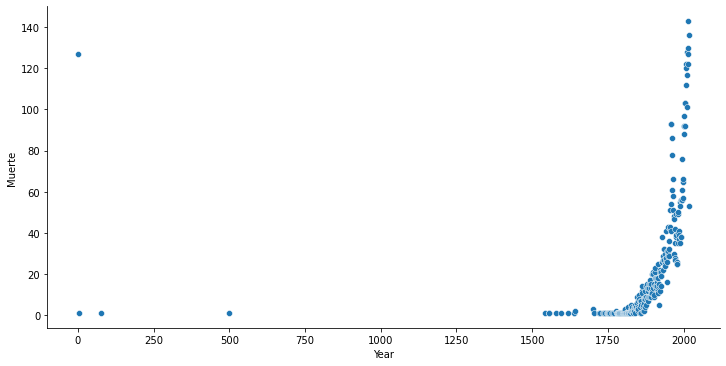

In [18]:
sns.relplot(data=hip3, x="Year", y="Muerte",  height=5, aspect=2)

In [ ]:
#Como se puede ver, las muertes por ataque de tiburón se incrementaron en gran medida a partir del s XX, siendo este perído el de mayor actividad.
#La tercera hipóesis es FALSA